In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC

In [3]:
# Import Dataset
df = pd.read_csv('bmi.csv')

### **Data Exploration and Cleanup** ###
Conduct initial data exploration to understand dataset characteristics.
Clean the data by handling missing values or anomalies.

In [19]:
# see the dataset as dataframe
print(df.head(5))
print("#" * 50)

# See the description of dataset
print(df.describe())
print("#" * 50)

# see the info of data
print(df.info())
print("#" * 50)

# check for nulls
print(df.isnull().sum())
print("#" * 50)

# check data types
print(df.dtypes)

# 

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
##################################################
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dt

##### **Visualize the Distribution of Feature and Target Label** #####

In [7]:
print(df['Gender'].value_counts())
print("\nGender category is almost uniformaly distributed. There is no high imbalance in data for gender feature.\n")
print(df['Index'].value_counts())
print("\nCategorical target variable is not uniformaly distributed. There is high imbalance in the clasess of Index target variable.")

Gender
Female    255
Male      245
Name: count, dtype: int64

Gender category is almost uniformaly distributed. There is no high imbalance in data for gender feature.

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

Categorical target variable is not uniformaly distributed. There is high imbalance in the clasess of Index target variable.


The **distribution of the categorical target variable (Index/BMI)** is not uniform, indicating an imbalance among the classes of the Index variable.

### **Exploratory Data Analysis (EDA)** ####
Analyze the distribution of BMI categories and explore the relationship between gender,
height, weight, and BMI category.
Investigate gender-specific distributions for height, weight, and BMI categories.

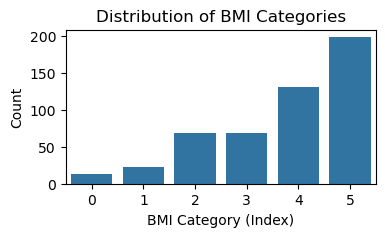

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(4, 2))

# Visualize the distribution of BMI categories (Index)
sns.countplot(x='Index', data=df)
plt.title('Distribution of BMI Categories')
plt.ylabel('Count')
plt.xlabel('BMI Category (Index)')
plt.show()

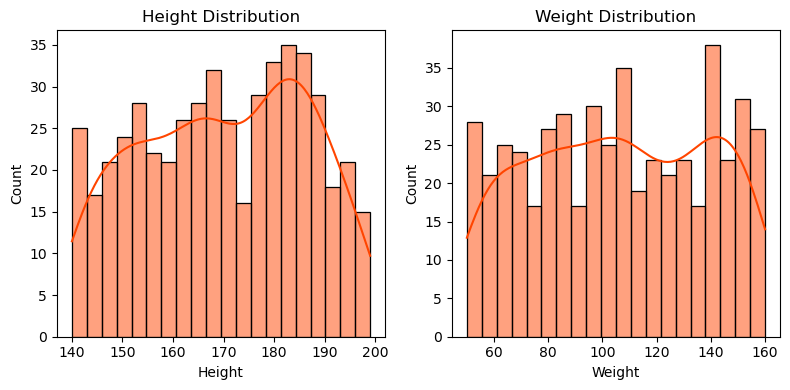

In [11]:
# List of features to plot
features = ['Height', 'Weight']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.flatten()

# Loop through each feature and plot its distribution
for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=20, kde=True, color='orangered', ax=axs[i])
    axs[i].set_title(f'{feature} Distribution')
    
# Show plot
plt.tight_layout()
plt.show()

<Axes: >

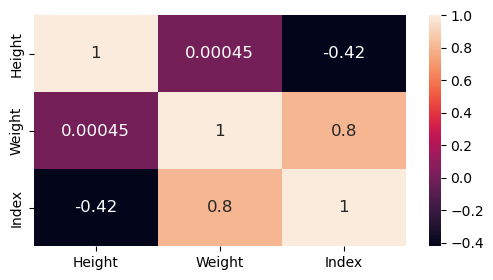

In [12]:
correlation_matrix = df.drop(columns=['Gender']).corr()
# Show the correlation plot heatmap
fig, ax = plt.subplots(figsize = (6,3))
sns.heatmap(correlation_matrix, annot=True, annot_kws = {'size': 12} )

##### **Box plot to visualize relationship between Gender, Height, Weight and Index** #####

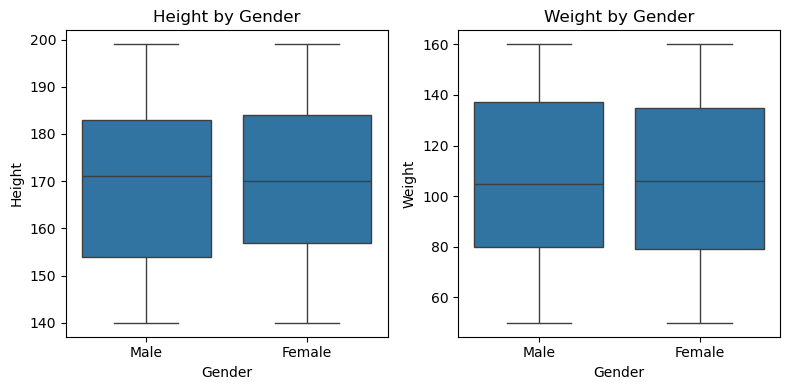

In [13]:
# List of features
features = ['Height', 'Weight']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.flatten()

# Iterate over features to create a boxplot for each feature
for i, feature in enumerate(features):
    # Create a Seaborn boxplot
    sns.boxplot(x='Gender', y=feature, data=df, ax=axs[i])
    
    # Set titles and labels
    axs[i].set_title(f'{feature} by Gender')
    axs[i].set_xlabel('Gender')
    axs[i].set_ylabel(feature)

# Show plot
plt.tight_layout()
plt.show()

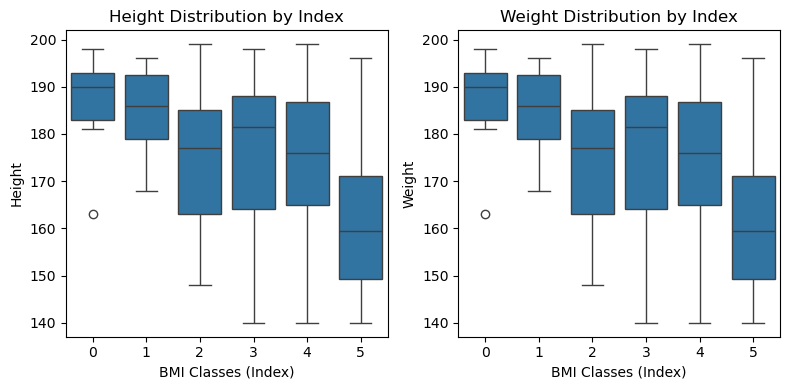

In [14]:
# List of features
features = ['Height', 'Weight']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.flatten()

# Iterate over features to create a boxplot for each Index
for i, feature in enumerate(features):
    # Create a Seaborn boxplot
    sns.boxplot(x='Index', y='Height', data=df, ax=axs[i])
    
    # Set titles and labels
    axs[i].set_title(f'{feature} Distribution by Index')
    axs[i].set_xlabel('BMI Classes (Index)')
    axs[i].set_ylabel(feature)

# Show plot
plt.tight_layout()
plt.show()

Above boxplot shows that there is unusual datapoint in BMI for index '0' for Height and Weight. This data point is below whisker and in a clear outlier zone. This datapoint is in the range more suitable for Index 2,3,4, or 5. 

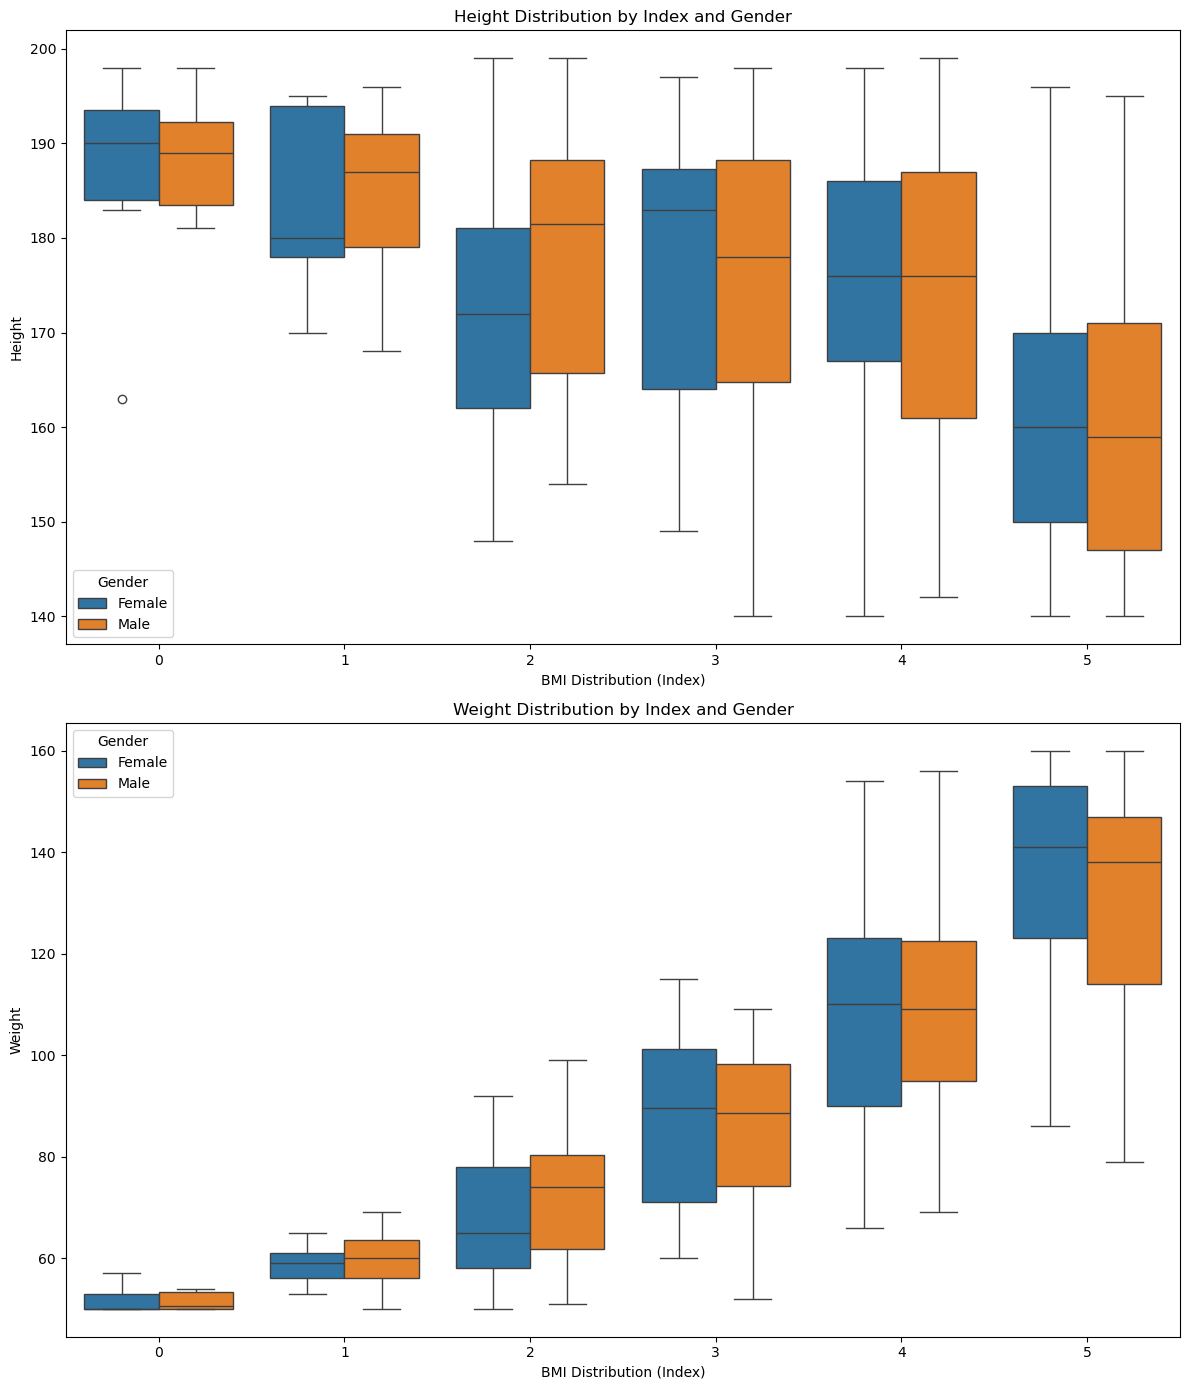

In [15]:
# List of features
features = ['Height', 'Weight']
fig, axs = plt.subplots(2, 1, figsize=(12, 14))
axs = axs.flatten()

# Iterate over features to create a boxplot for each
for i, feature in enumerate(features):
    # Create a Seaborn boxplot
    # sns.boxplot(x='Gender', y=feature, data=df, ax=axs[i])
    sns.boxplot(x='Index', y=feature, hue='Gender', data=df, ax=axs[i])
    
    # Set titles and labels
    axs[i].set_title(f'{feature} Distribution by Index and Gender')
    axs[i].set_xlabel('BMI Distribution (Index)')
    axs[i].set_ylabel(feature)

# Show plot
plt.tight_layout()
plt.show()


### **Data Preprocessing** ###
Implement strategies to manage imbalanced data, such as oversampling,
undersampling, or applying SMOTE.
Normalize or standardize height and weight features for better model performance.

The purpose for **data preprocessing** is to make data in usable format for model training.

Some of the required steps are as follows:
1. **One-hot encoding**: Perform one-hot encoding to convert categorical column Gender to numerical format.
2. **Feature Scaling**: Use normalization or standarization to perform feature scaling.

Target categorical variable Index contains **imbalance data**. Such data gives misleading model by giving high accuracy to some categories and low prediction accuracy to other category. So to reduce such situation data must be balanced for all categories of target variable.

Three techniques can be performed to handle unbalance data are:
**Using Oversampling** ,
**Under Sampling**,
**SMOTE**

In [16]:
# Convert 'Gender' to numerical format using pandas get_dummies(for one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['Gender']).astype(int)
print(df_encoded.head(5))

   Height  Weight  Index  Gender_Female  Gender_Male
0     174      96      4              0            1
1     189      87      2              0            1
2     185     110      4              1            0
3     195     104      3              1            0
4     149      61      3              0            1


### Using **Logistic Regression** ###

In [ ]:
# Split features (X) and target (y)
X_g = df_encoded[['Height', 'Weight', 'Gender_Female', 'Gender_Male']]  
y_g = df_encoded['Index']

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_g = scaler.fit_transform(X_train_g)
X_test_g = scaler.transform(X_test_g)

All the model building approach uses **GridSearchCV** to get the best model that provide high accuray. 
GridSearch perrform hyperparameter tuning and achieve the best parameter setting to give an optimize 
model. It uses cross validation of 5 folds where it train and validate hyperparameter. Dictionary of 
parameter is provided from where model select the best combination.**

In [66]:
model = LogisticRegression()

param_grid_notBalanced = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'multi_class':['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 1100, 1200], 'class_weight': [None]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'multi_class':['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 1100, 1200], 'class_weight': [None]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'multi_class':['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 1100, 1200], 'class_weight': [None]}
]

param_grid_balanced = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'multi_class':['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 1100, 1200], 'class_weight': ['balanced']},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'multi_class':['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 1100, 1200], 'class_weight': ['balanced']},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'multi_class':['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 1100, 1200], 'class_weight': ['balanced']}
]

# Optimized model using hyperparameter tuning
grid_search_notBalanced = GridSearchCV(model, param_grid_notBalanced, cv=5, scoring='accuracy', verbose=1)
grid_search_balanceed = GridSearchCV(model, param_grid_balanced, cv=5, scoring='accuracy', verbose=1)

Model Building **without balanced class weight** 

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_notBalanced.fit(X_train_g, y_train_g)

# Display the best parameters and score
print("Best parameters:", grid_search_notBalanced.best_params_)
print("Best cross-validated score:", grid_search_notBalanced.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_notBalanced.best_estimator_
predictions = best_model.predict(X_test_g)
print("Accuracy on test set:", accuracy_score(y_test_g, predictions))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_g, predictions, average='micro')
recall = recall_score(y_test_g, predictions, average='micro')
f1 = f1_score(y_test_g, predictions, average='micro')

# Output the precision, recall, and F1 score
print(f"Precision (micro): {precision}")
print(f"Recall (micro): {recall}")
print(f"F1 Score (micro): {f1}")

print("Confusion Matrix:\n", confusion_matrix(y_test_g, predictions))

# Evaluate the model performance
print(classification_report(y_test_g, predictions))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Best cross-validated score: 0.9225
Accuracy on test set: 0.92
Precision (micro): 0.92
Recall (micro): 0.92
F1 Score (micro): 0.92
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 17  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  3 26  1]
 [ 0  0  0  0  2 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       0.94      0.94      0.94        18
           3       0.70      0.88      0.78         8
           4       0.93      0.87      0.90        30
           5       0.97      0.95      0.96        39

    accuracy                           0.92       100
   macro avg       0.89      0.94      0.91       100
weighted avg       0.93      0.92      0.

Model Building **with balanced class weight** 

In [ ]:

sklearn_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_g), y=y_train_g)
sklearn_weights


array([5.55555556, 3.7037037 , 1.30718954, 1.11111111, 0.66666667,
       0.41928721])

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_balanceed.fit(X_train_g, y_train_g)

# Display the best parameters and score
print("Best parameters:", grid_search_balanceed.best_params_)
print("Best cross-validated score:", grid_search_balanceed.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_balanceed.best_estimator_
y_pred = best_model.predict(X_test_g)
print("Accuracy on test set:", accuracy_score(y_test_g, predictions))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_g, y_pred, average='micro')
recall = recall_score(y_test_g, y_pred, average='micro')
f1 = f1_score(y_test_g, y_pred, average='micro')

# Output the precision, recall, and F1 score
print(f"Precision (micro): {precision}")
print(f"Recall (micro): {recall}")
print(f"F1 Score (micro): {f1}")

print("Confusion Matrix:\n", confusion_matrix(y_test_g, predictions))

# Evaluate the model performance
print(classification_report(y_test_g, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 100, 'class_weight': 'balanced', 'max_iter': 1200, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Best cross-validated score: 0.8925000000000001
Accuracy on test set: 0.92
Precision (micro): 0.86
Recall (micro): 0.86
F1 Score (micro): 0.86
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 17  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  3 26  1]
 [ 0  0  0  0  2 37]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.60      0.75      0.67         4
           2       1.00      0.78      0.88        18
           3       0.53      1.00      0.70         8
           4       0.92      0.77      0.84        30
           5       0.97      0.95      0.96        39

    accuracy                           0.86       100
   macro avg       0.73      0.87      0.76       100
weighted avg       0.9

#### **Applying Sampling Techniques SMOTE** on train dataset and ensuring the class balance at BMI and Gender level ####

Spliting the data into test and train and performing **SMOTE in train dataset.**

In [7]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_g, y_g, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled_s, y_train_resampled_s = smote.fit_resample(X_train_s, y_train_s)

**Ensuring classes are balanced**

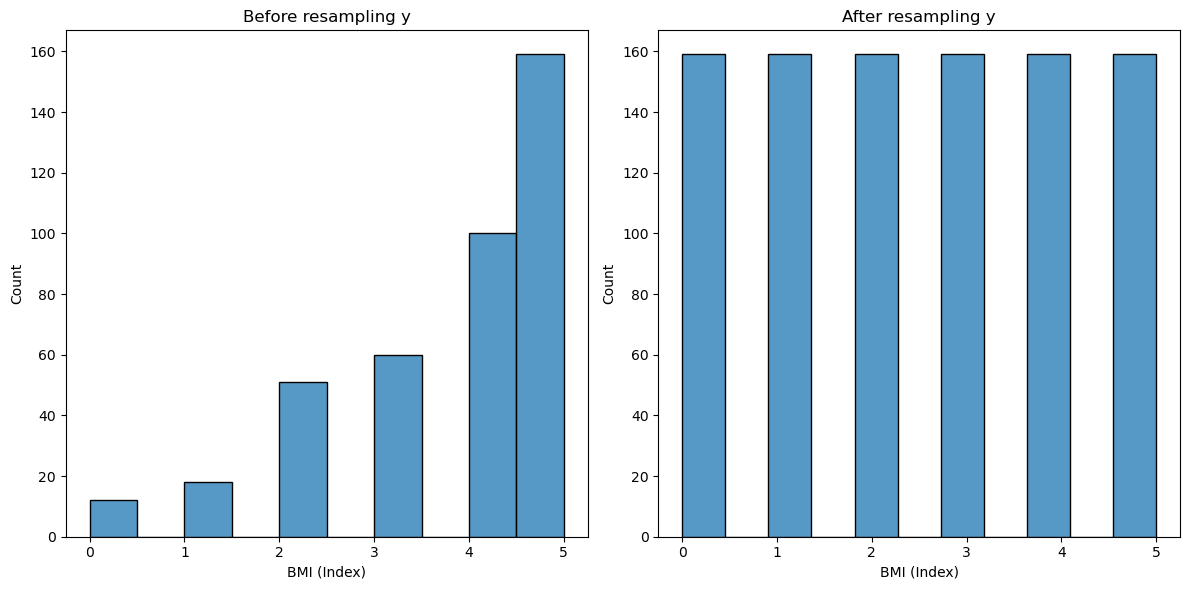

In [36]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
sns.histplot(y_train_s, ax=axs[0])
axs[0].set_title("Before resampling y")
axs[0].set_xlabel("BMI (Index)")
axs[0].set_ylabel("Count")

# Plot the second histogram
sns.histplot(y_train_resampled_s, ax=axs[1])
axs[1].set_title("After resampling y")
axs[1].set_xlabel("BMI (Index)")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Ensuring gender is balanced**

In [17]:
print("Shape of reshmpled data :",X_train_resampled_s.shape, X_train_resampled_s.shape)

# Checking where both Gender_Female and Gender_Male are 0 (i.e not assigning any gender to the record.)
missing_gender = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 0) & (X_train_resampled_s['Gender_Male'] == 0)]

# Display the count of such rows
print(f"Number of rows with missing gender encoding: {missing_gender.shape[0]}")

# Check where both Gender_Female and Gender_Male is 1 (i.e assigning male and female both to same record.)
duplicating_gender = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 1) & (X_train_resampled_s['Gender_Male'] == 1)]

# Display the count of such rows
print(f"Number of rows with duplicating gender encoding: {duplicating_gender.shape[0]}")

NameError: name 'X_train_resampled_s' is not defined

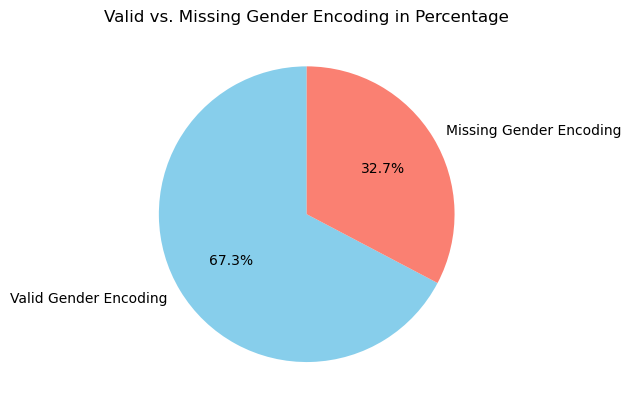

In [ ]:
# Counting the number of rows with valid and missing gender encoding.
valid_gender_count = X_train_resampled_s.shape[0] - missing_gender.shape[0]
missing_gender_count = missing_gender.shape[0]

# Pie chart
plt.pie([valid_gender_count, missing_gender_count], labels=['Valid Gender Encoding', 'Missing Gender Encoding'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Valid vs. Missing Gender Encoding in Percentage')
plt.show()

**Since there are many instances where gender assignment is missed during the SMOTE sampling process. So, assigning 0 or 1 to Gender Female and Male equally to make gender balance.**

In [39]:
# Rows with missing gender assigment during SMOTE sampling
gender_Female_ = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 1) ]
gender_Male_ = X_train_resampled_s[(X_train_resampled_s['Gender_Male'] == 1) ]
print(" Total Gender Female in Training set: ",len(gender_Female_))
print(" Total Gender Male in Training set: ",len(gender_Male_))

 Total Gender Female in Training set:  325
 Total Gender Male in Training set:  317


In [ ]:
# Finding rows with missing gender assignment SMOTE sampling
missing_gender_indices = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 0) & 
                                           (X_train_resampled_s['Gender_Male'] == 0)].index

# series of 0 is created equal to missing missing_gender length
gender_assignment = np.zeros(len(missing_gender_indices), dtype=int)

# half of the gender_assignment is assigned to Female and other half to Gender_Male
gender_assignment[:len(gender_assignment)//2] = 1 

# making a random series of 1 and 0 by suffling
np.random.shuffle(gender_assignment)


# Now assigning the vlaues back to the original training data 
X_train_resampled_s.loc[missing_gender_indices, 'Gender_Female'] = gender_assignment
X_train_resampled_s.loc[missing_gender_indices, 'Gender_Male'] = 1 - gender_assignment


# Verifing that there is no missing gender assignment
missing_gender_fixed = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 0) & 
                                         (X_train_resampled_s['Gender_Male'] == 0)]
print(f"Number of rows with missing gender encoding after fixing: {missing_gender_fixed.shape[0]}")


Number of rows with missing gender encoding after fixing: 0


In [41]:
# Rows with missing gender assigment during SMOTE sampling
gender_Female_ = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 1) ]
gender_Male_ = X_train_resampled_s[(X_train_resampled_s['Gender_Male'] == 1) ]
print(" Total Gender Female in Training set: ",len(gender_Female_))
print(" Total Gender Male in Training set: ",len(gender_Male_))

 Total Gender Female in Training set:  481
 Total Gender Male in Training set:  473


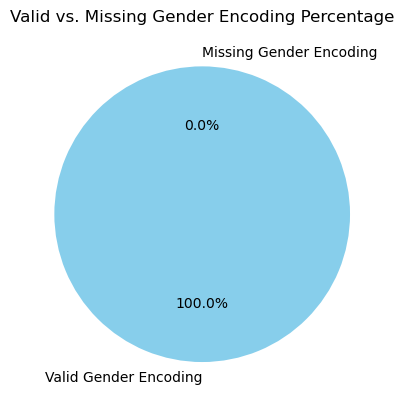

In [42]:
# Check if there are any rows where both Gender_Female and Gender_Male are 0
missing_gender = X_train_resampled_s[(X_train_resampled_s['Gender_Female'] == 0) & (X_train_resampled_s['Gender_Male'] == 0)]

# Count the number of rows with valid and missing gender encoding
valid_gender_count = X_train_resampled_s.shape[0] - missing_gender.shape[0]
missing_gender_count = missing_gender.shape[0]

# Pie chart
plt.pie([valid_gender_count, missing_gender_count], labels=['Valid Gender Encoding', 'Missing Gender Encoding'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Valid vs. Missing Gender Encoding Percentage')
plt.show()

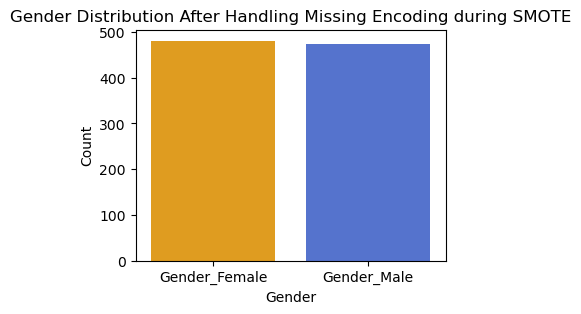

In [43]:
# Bar plot to visualize the gender distribution
plt.figure(figsize=(4, 3))

# Creating count for gender
gender_counts = X_train_resampled_s[['Gender_Female', 'Gender_Male']].sum()

sns.barplot(data=gender_counts,  palette=['orange', 'royalblue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution After Handling Missing Encoding during SMOTE')
plt.show()

#### **SMOTE Analysis Conclusion** ####

When SMOTE sampling is applied to the training (X_train and y_train) dataset do not produce the balanced data at gender level. However it has successfully generated equally distributed data at BMI class level showing equal number of data in each target class.
SMOTE missed many date to categorize it either into Gender_Female or Gender_Male. So, the missed data points are equally divided into two and assign 1 for Gender_Female (0 for Gender_Male) and 1 for Gender_Male (0 for Gender_Female) in respective columns.

### **Logistic Regression using SMOTE** ###

**Logistic Regression with equal class weight class_weight=None**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_notBalanced.fit(X_train_resampled_s, y_train_resampled_s)

# Displaying the best parameters and score
print("Best parameters:", grid_search_notBalanced.best_params_)
print("Best cross-validated score:", grid_search_notBalanced.best_score_)

# Evaluating the best model found by GridSearchCV on the test set
best_model = grid_search_notBalanced.best_estimator_
y_pred_lr_n = best_model.predict(X_test_s)
print("Accuracy on test set:", accuracy_score(y_test_s, y_pred_lr_n))

# Calculating precision, recall, and F1 score
precision = precision_score(y_test_s, y_pred_lr_n, average='micro')
recall = recall_score(y_test_s, y_pred_lr_n, average='micro')
f1 = f1_score(y_test_s, y_pred_lr_n, average='micro')

# Output the precision, recall, and F1 score
print(f"Precision (micro): {precision}")
print(f"Recall (micro): {recall}")
print(f"F1 Score (micro): {f1}")

print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_lr_n))

# Evaluate the model performance
print(classification_report(y_test_s, y_pred_lr_n))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 1200, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated score: 0.8752493799944888
Accuracy on test set: 0.86
Precision (micro): 0.86
Recall (micro): 0.86
F1 Score (micro): 0.86
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  1  6  1  0]
 [ 0  0  0  8 22  0]
 [ 0  0  0  0  2 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       0.94      0.89      0.91        18
           3       0.43      0.75      0.55         8
           4       0.88      0.73      0.80        30
           5       1.00      0.95      0.97        39

    accuracy                           0.86       100
   macro avg       0.82      0.89      0.84       100
weighted avg       0.89    

**Logistic Regression with unequal class weight (i.e weight based on the frequency of class)**

In [ ]:
sklearn_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_s), y=y_train_s)
print(f"Following class weight are assigned for balanced class weight : {sklearn_weights}")

array([5.55555556, 3.7037037 , 1.30718954, 1.11111111, 0.66666667,
       0.41928721])

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_balanceed.fit(X_train_resampled_s, y_train_resampled_s)

# Display the best parameters and score
print("Best parameters:", grid_search_balanceed.best_params_)
print("Best cross-validated score:", grid_search_balanceed.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_balanceed.best_estimator_
y_pred_lr_b = best_model.predict(X_test_s)
print("Accuracy on test set:", accuracy_score(y_test_s, y_pred_lr_b))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_s, y_pred_lr_b, average='micro')
recall = recall_score(y_test_s, y_pred_lr_b, average='micro')
f1 = f1_score(y_test_s, y_pred_lr_b, average='micro')

# Output the precision, recall, and F1 score
print(f"Precision (micro): {precision}")
print(f"Recall (micro): {recall}")
print(f"F1 Score (micro): {f1}")

print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_lr_b))

# Evaluate the model performance
print(classification_report(y_test_s, y_pred_lr_b))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 100, 'class_weight': 'balanced', 'max_iter': 1200, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated score: 0.866883438963902
Accuracy on test set: 0.87
Precision (micro): 0.87
Recall (micro): 0.87
F1 Score (micro): 0.87
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 1  1 16  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  8 22  0]
 [ 0  0  0  0  2 37]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.80      1.00      0.89         4
           2       0.94      0.89      0.91        18
           3       0.47      0.88      0.61         8
           4       0.92      0.73      0.81        30
           5       1.00      0.95      0.97        39

    accuracy                           0.87       100
   macro avg       0.77      0.91      0.81       100
weighted avg       0.9

**Using SVM Without SMOTE**


In [68]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale']  # 'scale' since it's usually effective with SVM
}

# Initializing Support Vector Machine (SVM) model 
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_svm.fit(X_train_g, y_train_g)

print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated score:", grid_search_svm.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_svm.best_estimator_
y_pred_svm = best_model.predict(X_test_g)
print("Accuracy on test set:", accuracy_score(y_test_g, y_pred_svm))

def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_g, y_pred_svm, "SVM")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9400000000000001
Accuracy on test set: 0.93
Model: SVM
Accuracy Score: 0.93
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 17  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  1 26  3]
 [ 0  0  0  0  1 38]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       0.94      0.94      0.94        18
           3       0.88      0.88      0.88         8
           4       0.96      0.87      0.91        30
           5       0.93      0.97      0.95        39

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.93      0.93      0.93       100

------------------------------------------------------


**SVM using SMOTE**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_svm.fit(X_train_resampled_s, y_train_resampled_s)

print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated score:", grid_search_svm.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_svm.best_estimator_
y_pred_svm_resampled_s = best_model.predict(X_test_s)
print("Accuracy on test set:", accuracy_score(y_test_s, y_pred_svm_resampled_s))

def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_s, y_pred_svm_resampled_s, "SVM")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9433948746211078
Accuracy on test set: 0.92
Model: SVM
Accuracy Score: 0.92
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  4 25  1]
 [ 0  0  0  0  2 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       0.95      1.00      0.97        18
           3       0.64      0.88      0.74         8
           4       0.93      0.83      0.88        30
           5       0.97      0.95      0.96        39

    accuracy                           0.92       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.93      0.92      0.92       100

------------------------------------------------------


**Using KNN without SMOTE**

In [ ]:
param_grid = {
    'n_neighbors': range(5, 10),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_knn.fit(X_train_g, y_train_g)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validated score:", grid_search_knn.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_knn.best_estimator_
y_pred_knn = best_model.predict(X_test_g)
print("Accuracy on test set:", accuracy_score(y_test_g, y_pred_knn))

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_g, y_pred_knn, "KNN")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validated score: 0.8675
Accuracy on test set: 0.9
Model: KNN
Accuracy Score: 0.9
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1 16  1  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  1  2 24  3]
 [ 0  0  0  0  2 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       0.94      0.89      0.91        18
           3       0.73      1.00      0.84         8
           4       0.92      0.80      0.86        30
           5       0.93      0.95      0.94        39

    accuracy                           0.90       100
   macro avg       0.89      0.94      0.91       100
weighted avg       0.91      0.90      0.90       100

------------------------------------------------------


**KNN using SMOTE** 

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_knn.fit(X_train_resampled_s, y_train_resampled_s)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validated score:", grid_search_knn.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_knn.best_estimator_
y_pred_knn_resampled_s = best_model.predict(X_test_s)
print("Accuracy on test set:", accuracy_score(y_test_s, y_pred_knn_resampled_s))

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test_s, y_pred_knn_resampled_s, "KNN")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validated score: 0.9528354918710388
Accuracy on test set: 0.93
Model: KNN
Accuracy Score: 0.93
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  1 26  3]
 [ 0  0  0  0  2 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       0.95      1.00      0.97        18
           3       0.88      0.88      0.88         8
           4       0.93      0.87      0.90        30
           5       0.93      0.95      0.94        39

    accuracy                           0.93       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.93      0.93      0.93       100

------------------------------------------------------


#### **Gender-Specific Modeling: Train separate models for each gender to evaluate if model performance improves when predicting BMI categories within gender groups** ####

Creating new X and y datasets for each gender male and female

#### **For Male Gender** ####

In [41]:

# drop the columns 
df_male = df_encoded[df_encoded['Gender_Male']==1].drop(columns=['Gender_Male','Gender_Female'])
df_male

# Split features (X) and target (y)
X_male = df_male[['Height', 'Weight']]  
y_male = df_male['Index']


X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_m = scaler.fit_transform(X_train_m)
X_test_m = scaler.transform(X_test_m)

smote = SMOTE(k_neighbors=4, random_state=42)
X_train_resampled_m_s, y_train_resampled_m_s = smote.fit_resample(X_train_m, y_train_m)


**Using SVM** 

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_svm.fit(X_train_m, y_train_m)

print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated score:", grid_search_svm.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_svm.best_estimator_
y_pred_svm_m = best_model.predict(X_test_m)
print("Accuracy on test set:", accuracy_score(y_test_m, y_pred_svm_m))


def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_m, y_pred_svm_m, "SVM")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9592307692307692
Accuracy on test set: 0.9795918367346939
Model: SVM
Accuracy Score: 0.9795918367346939
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        17

    accuracy                           0.98        49
   macro avg       0.92      0.97      0.93        49
weighted avg       0.99      0.98      0.98        49

---------------------------

**Using SVM and SMOTE**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_svm.fit(X_train_resampled_m_s, y_train_resampled_m_s)

print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated score:", grid_search_svm.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_svm.best_estimator_
y_pred_svm_resampled_m_s = best_model.predict(X_test_m)
print("Accuracy on test set:", accuracy_score(y_test_m, y_pred_svm_resampled_m_s))


def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_m, y_pred_svm_resampled_m_s, "SVM")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9754357592093441
Accuracy on test set: 0.9795918367346939
Model: SVM
Accuracy Score: 0.9795918367346939
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        17

    accuracy                           0.98        49
   macro avg       0.92      0.97      0.93        49
weighted avg       0.99      0.98      0.98        49

---------------------------

**Using KNN without SMOTE**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_knn.fit(X_train_m, y_train_m)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validated score:", grid_search_knn.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_knn.best_estimator_
y_pred_knn_m = best_model.predict(X_test_m)
print("Accuracy on test set:", accuracy_score(y_test_m, y_pred_knn_m))

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_m, y_pred_knn_m, "KNN")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validated score: 0.8880769230769232
Accuracy on test set: 0.9387755102040817
Model: KNN
Accuracy Score: 0.9387755102040817
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  8  1  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  0 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         7
           3       1.00      0.89      0.94         9
           4       0.90      0.90      0.90        10
           5       0.94      1.00      0.97        17

    accuracy                           0.94        49
   macro avg       0.89      0.93      0.89        49
weighted avg       0.95      0.94      0.94        49

------------------------------------------------------


**KNN with SMOTE**


In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_knn.fit(X_train_resampled_m_s, y_train_resampled_m_s)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validated score:", grid_search_knn.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_knn.best_estimator_
y_pred_knn_resampled_m_s = best_model.predict(X_test_m)
print("Accuracy on test set:", accuracy_score(y_test_m, y_pred_knn_resampled_m_s))

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_m, y_pred_knn_resampled_m_s, "KNN")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validated score: 0.9735309973045823
Accuracy on test set: 0.8979591836734694
Model: KNN
Accuracy Score: 0.8979591836734694
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  1  7  1  0]
 [ 0  0  0  1  9  0]
 [ 0  0  0  0  1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       0.88      1.00      0.93         7
           3       0.88      0.78      0.82         9
           4       0.82      0.90      0.86        10
           5       1.00      0.94      0.97        17

    accuracy                           0.90        49
   macro avg       0.84      0.90      0.86        49
weighted avg       0.91      0.90      0.90        49

------------------------------------------------------


#### **For Female Gender** ####

In [ ]:
# drop the columns 
df_female = df_encoded[df_encoded['Gender_Female']==1].drop(columns=['Gender_Male','Gender_Female'])

# Split features (X) and target (y)
X_female = df_female[['Height', 'Weight']]  
y_female = df_female['Index']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_f = scaler.fit_transform(X_train_f)
X_test_f = scaler.transform(X_test_f)

smote = SMOTE(k_neighbors=4, random_state=42)
X_train_resampled_f_s, y_train_resampled_f_s = smote.fit_resample(X_train_f, y_train_f)



**Using SVM without SMOTE**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_svm.fit(X_train_f, y_train_f)

print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated score:", grid_search_svm.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_svm.best_estimator_
y_pred_svm_f = best_model.predict(X_test_f)
print("Accuracy on test set:", accuracy_score(y_test_f, y_pred_svm_f))


def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_f, y_pred_svm_f, "SVM")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9024390243902438
Accuracy on test set: 0.9019607843137255
Model: SVM
Accuracy Score: 0.9019607843137255
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  2  8  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.56      0.83      0.67         6
           3       1.00      0.80      0.89        10
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        21

    accuracy                           0.90        51
   macro avg       0.70      0.73      0.70        51
weighted avg       0.89      0.90      0.89        51

------------------------------------------------------


**Using SVM with SMOTE**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_svm.fit(X_train_resampled_f_s, y_train_resampled_f_s)

print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated score:", grid_search_svm.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_svm.best_estimator_
y_pred_svm_resampled_f_s = best_model.predict(X_test_f)
print("Accuracy on test set:", accuracy_score(y_test_f, y_pred_svm_resampled_f_s))


def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_f, y_pred_svm_resampled_f_s, "SVM")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated score: 0.9375300721732158
Accuracy on test set: 0.9215686274509803
Model: SVM
Accuracy Score: 0.9215686274509803
Confusion Matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  3  7  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.62      0.83      0.71         6
           3       1.00      0.70      0.82        10
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        21

    accuracy                           0.92        51
   macro avg       0.91      0.91      0.90        51
weighted avg       0.94      0.92      0.92        51

------------------------------------------------------


**KNN without SMOTE**

In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_knn.fit(X_train_f, y_train_f)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validated score:", grid_search_knn.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_knn.best_estimator_
y_pred_knn_f = best_model.predict(X_test_f)
print("Accuracy on test set:", accuracy_score(y_test_f, y_pred_knn_f))

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")

evaluate_model(y_test_f, y_pred_knn_f, "KNN")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validated score: 0.8629268292682927
Accuracy on test set: 0.8431372549019608
Model: KNN
Accuracy Score: 0.8431372549019608
Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0  5  0  1  0]
 [ 0  3  6  1  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.83      0.62         6
           3       1.00      0.60      0.75        10
           4       0.80      1.00      0.89        12
           5       1.00      0.95      0.98        21

    accuracy                           0.84        51
   macro avg       0.66      0.68      0.65        51
weighted avg       0.85      0.84      0.83        51

------------------------------------------------------


**KNN with SMOTE**


In [ ]:
# Using optimized model from GridSearchCV to fit the training data
grid_search_knn.fit(X_train_resampled_f_s, y_train_resampled_f_s)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validated score:", grid_search_knn.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search_knn.best_estimator_
knn_pred_resampled_f_s = best_model.predict(X_test_f)
print("Accuracy on test set:", accuracy_score(y_test_f, knn_pred_resampled_f_s))

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test_f, knn_pred_resampled_f_s, "KNN")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validated score: 0.9282812082330928
Accuracy on test set: 0.9019607843137255
Model: KNN
Accuracy Score: 0.9019607843137255
Confusion Matrix:
 [[ 2  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  2  7  1  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1 20]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.71      0.83      0.77         6
           3       1.00      0.70      0.82        10
           4       0.80      1.00      0.89        12
           5       1.00      0.95      0.98        21

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.89        51
weighted avg       0.92      0.90      0.90        51

------------------------------------------------------
